  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1149 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:08<01:23,  8.38s/it]

  0%|          | 0/1068 [00:00<?, ?it/s]

 18%|█▊        | 2/11 [00:16<01:12,  8.01s/it]

  0%|          | 0/1028 [00:00<?, ?it/s]

 27%|██▋       | 3/11 [00:24<01:04,  8.02s/it]

  0%|          | 0/993 [00:00<?, ?it/s]

 36%|███▋      | 4/11 [00:31<00:55,  7.88s/it]

  0%|          | 0/1003 [00:00<?, ?it/s]

 45%|████▌     | 5/11 [00:39<00:46,  7.80s/it]

  0%|          | 0/776 [00:00<?, ?it/s]

 55%|█████▍    | 6/11 [00:44<00:34,  6.98s/it]

  0%|          | 0/842 [00:00<?, ?it/s]

 64%|██████▎   | 7/11 [00:51<00:26,  6.75s/it]

  0%|          | 0/738 [00:00<?, ?it/s]

 73%|███████▎  | 8/11 [00:56<00:18,  6.19s/it]

  0%|          | 0/767 [00:00<?, ?it/s]

 82%|████████▏ | 9/11 [01:01<00:11,  5.96s/it]

  0%|          | 0/538 [00:00<?, ?it/s]

 91%|█████████ | 10/11 [01:05<00:05,  5.19s/it]

  0%|          | 0/996 [00:00<?, ?it/s]

100%|██████████| 11/11 [01:13<00:00,  6.65s/it]


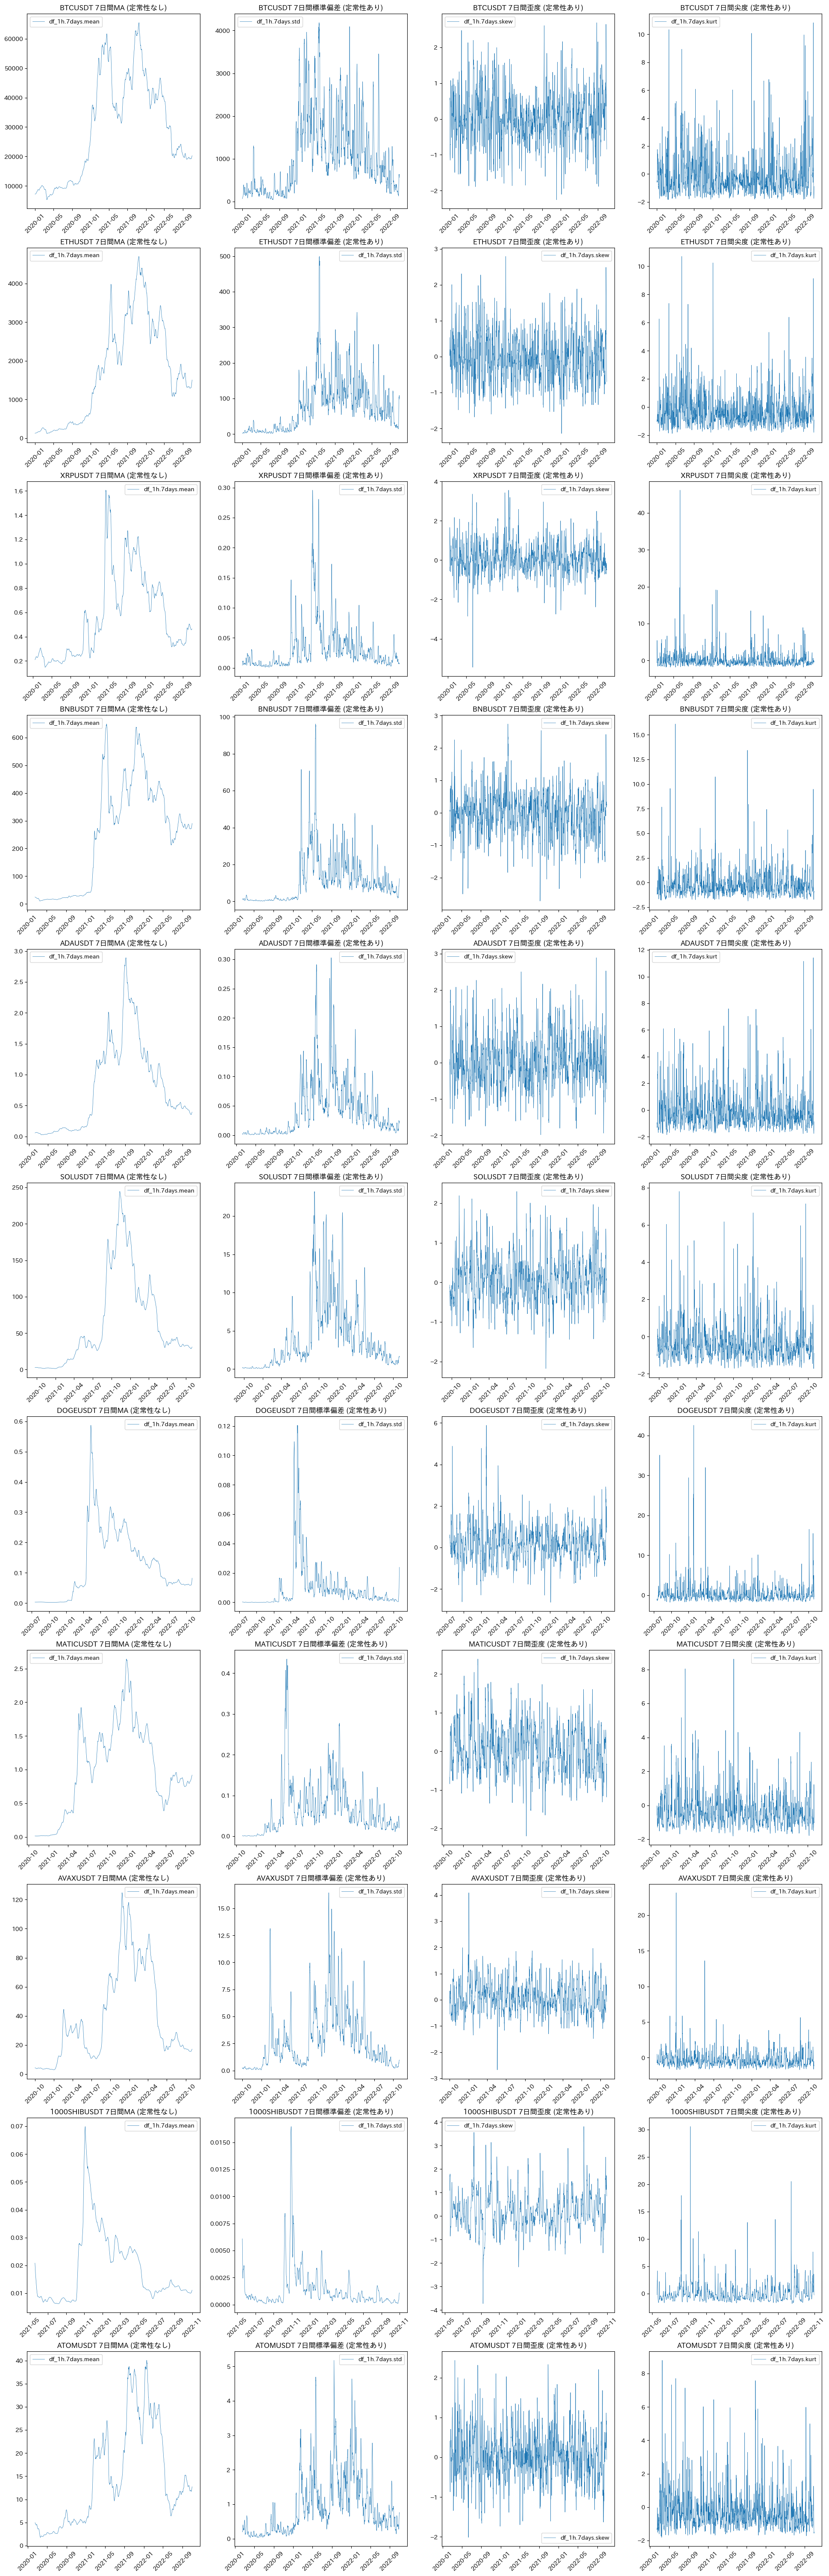

In [4]:
import pandas as pd
import numpy as np
import statsmodels
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import japanize_matplotlib
from tqdm import tqdm
import exercise_util

target_symbols = list(exercise_util.target_symbols.keys())

cols = 4
rows = len(target_symbols)
fig, axs = plt.subplots(rows, cols, figsize = (8 * cols, 7 * rows))

window_days = 7

for _idx, _symbol in tqdm(enumerate(target_symbols), total = len(target_symbols)):
    df_1h = exercise_util.concat_timebar_files(_symbol, 3600)

    df_1h['close_7days_mean'] = df_1h['close'].rolling(window_days * 24).mean()
    df_1h['close_7days_std'] = df_1h['close'].rolling(window_days * 24).std()
    df_1h['close_7days_skew'] = df_1h['close'].rolling(window_days * 24).skew()
    df_1h['close_7days_kurt'] = df_1h['close'].rolling(window_days * 24).kurt()

    df_1h.dropna(inplace = True)

    _ax = axs[_idx, 0]
    _ax.tick_params(axis = 'x', labelrotation = 45)
    _ax.plot(df_1h.loc[df_1h.index > '2020-01-01', 'close_7days_mean'], label = 'df_1h.7days.mean', linewidth = 0.5)
    _ax.legend()
    _stationary = exercise_util.adf_stationary_test(df_1h.loc[df_1h.index > '2020-01-01', 'close_7days_mean'])
    _ax.set_title(f'{_symbol} {window_days}日間MA (定常性{"あり" if _stationary == True else "なし"})')

    _ax = axs[_idx, 1]
    _ax.tick_params(axis = 'x', labelrotation = 45)
    _ax.plot(df_1h.loc[df_1h.index > '2020-01-01', 'close_7days_std'], label = 'df_1h.7days.std', linewidth = 0.5)
    _ax.legend()
    _stationary = exercise_util.adf_stationary_test(df_1h.loc[df_1h.index > '2020-01-01', 'close_7days_std'])
    _ax.set_title(f'{_symbol} {window_days}日間標準偏差 (定常性{"あり" if _stationary == True else "なし"})')

    _ax = axs[_idx, 2]
    _ax.tick_params(axis = 'x', labelrotation = 45)
    _ax.plot(df_1h.loc[df_1h.index > '2020-01-01', 'close_7days_skew'], label = 'df_1h.7days.skew', linewidth = 0.5)
    _ax.legend()
    _stationary = exercise_util.adf_stationary_test(df_1h.loc[df_1h.index > '2020-01-01', 'close_7days_skew'])
    _ax.set_title(f'{_symbol} {window_days}日間歪度 (定常性{"あり" if _stationary == True else "なし"})')

    _ax = axs[_idx, 3]
    _ax.tick_params(axis = 'x', labelrotation = 45)
    _ax.plot(df_1h.loc[df_1h.index > '2020-01-01', 'close_7days_kurt'], label = 'df_1h.7days.kurt', linewidth = 0.5)
    _ax.legend()
    _stationary = exercise_util.adf_stationary_test(df_1h.loc[df_1h.index > '2020-01-01', 'close_7days_kurt'])
    _ax.set_title(f'{_symbol} {window_days}日間尖度 (定常性{"あり" if _stationary == True else "なし"})')

fig.show()